This is the baseline for the project. This will be implemented as various classifier models over the 29,950 training instances (15k fire = 0, 14,950 fire = 1).

In [1]:
# Standard library imports
import os

# Third-party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn imports
from sklearn.model_selection import train_test_split

# Load dataset
DATA_PATH = "../data/final_combined_dataset.csv"
data = pd.read_csv(DATA_PATH)

# Prepare features and target
X = data.drop("FIRE", axis=1)
y = data['FIRE']

# Split data into training and testing sets
# Using 80/20 split with fixed random state for reproducibility
RANDOM_STATE = 1234
TEST_SIZE = 0.2

X_train, X_test, y_train, y_test, data_train, data_test = train_test_split(
    X, y, data, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

# Display dataset shapes
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

/home/paul/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Training set shape: (23960, 13)
Test set shape: (5990, 13)
Training labels shape: (23960,)
Test labels shape: (5990,)


/home/paul/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/paul/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,name,Training Accuracy,Eval Accuracy,Training Recall,Eval Recall,Training Precision,Eval Precision,Training F1,Eval F1
0,Random Forest,0.999958,0.977462,1.000000,0.984332,0.999917,0.970124,0.999958,0.977177
1,Decision Tree,1.000000,0.967947,1.000000,0.969005,1.000000,0.965716,1.000000,0.967358
2,Logistic Regression,0.943614,0.937896,0.951557,0.944142,0.936972,0.930201,0.944208,0.937120
3,Multilayer Perceptron,0.498581,0.509850,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000



Generating Confusion Matrices

Training Random Forest...


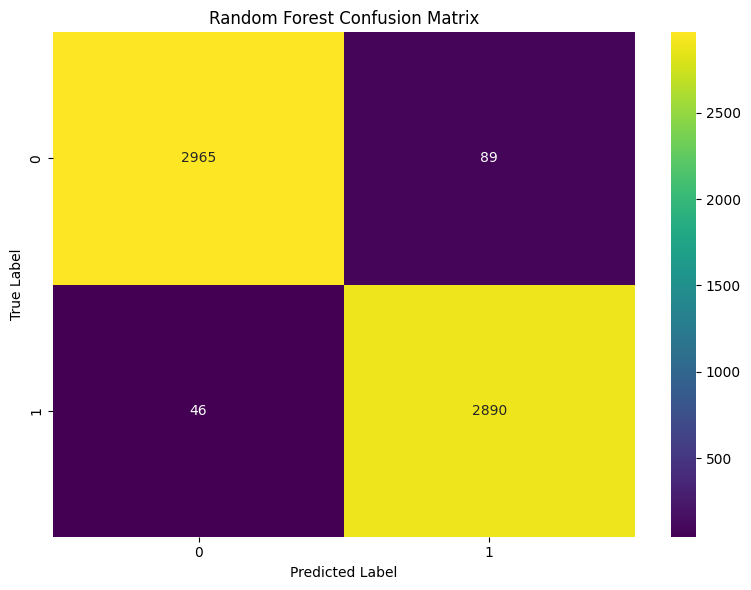


Training Decision Tree...


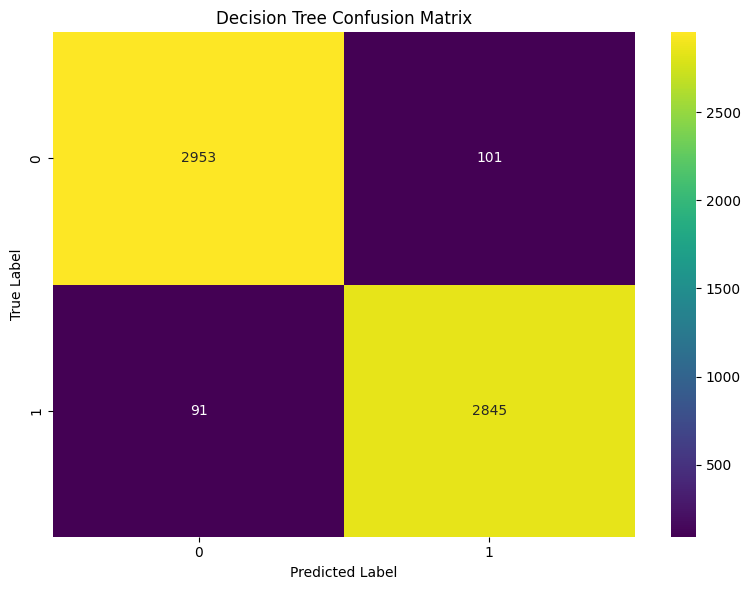


Training Logistic Regression...


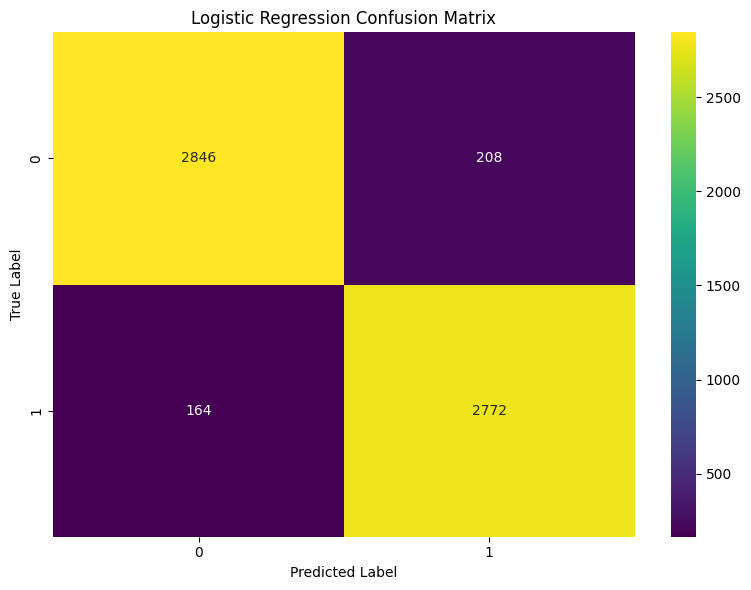


Training Multilayer Perceptron...


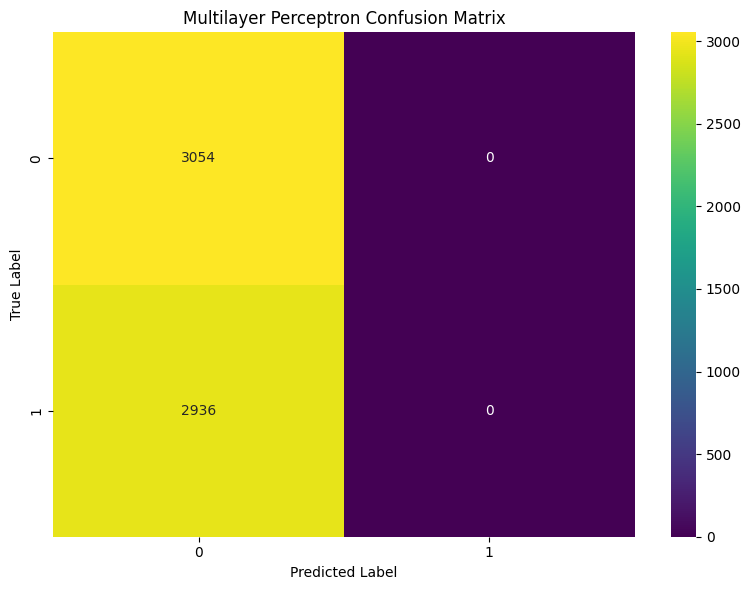

In [2]:
# Scikit-learn imports
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)


def evaluate_pipelines(pipelines, X_train, y_train, X_evaluate, y_evaluate):

    rows = []
    for name, pipeline in pipelines:
        # Fit pipeline on training data
        pipeline.fit(X_train, y_train)
        
        # Generate predictions
        train_preds = pipeline.predict(X_train)
        eval_preds = pipeline.predict(X_evaluate)
        
        # Calculate metrics
        train_accuracy = accuracy_score(y_train, train_preds)
        eval_accuracy = accuracy_score(y_evaluate, eval_preds)
        
        train_recall = recall_score(y_train, train_preds)
        eval_recall = recall_score(y_evaluate, eval_preds)
        
        train_precision = precision_score(y_train, train_preds)
        eval_precision = precision_score(y_evaluate, eval_preds)
        
        train_f1 = f1_score(y_train, train_preds)
        eval_f1 = f1_score(y_evaluate, eval_preds)
        
        rows.append({
            'name': name,
            'Training Accuracy': train_accuracy,
            'Eval Accuracy': eval_accuracy,
            'Training Recall': train_recall,
            'Eval Recall': eval_recall,
            'Training Precision': train_precision,
            'Eval Precision': eval_precision,
            'Training F1': train_f1,
            'Eval F1': eval_f1
        })
    
    return pd.DataFrame(rows)


def plot_confusion_matrix(y_true, y_pred, clf_name):

    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='viridis')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{clf_name} Confusion Matrix')
    plt.tight_layout()
    plt.show()


# Initialize baseline models
models = {
    'Random Forest': make_pipeline(RandomForestClassifier(random_state=RANDOM_STATE)),
    'Decision Tree': make_pipeline(DecisionTreeClassifier(random_state=RANDOM_STATE)),
    'Logistic Regression': make_pipeline(
        LogisticRegression(random_state=RANDOM_STATE, max_iter=10000)
    ),
    'Multilayer Perceptron': make_pipeline(
        MLPClassifier(max_iter=10000, random_state=RANDOM_STATE)
    )
}

# Convert to list of tuples for evaluation
pipelines = [(name, model) for name, model in models.items()]

# Evaluate all models
results_df = evaluate_pipelines(pipelines, X_train, y_train, X_test, y_test)
display(results_df)

# Generate confusion matrices for all models
print("\n" + "="*50)
print("Generating Confusion Matrices")
print("="*50)

for name, clf in pipelines:
    print(f"\nTraining {name}...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, name)
